# 🌲 **Mini-projeto: Árvore de Decisão**

## Grupo:

*   Arthur Brito Medeiros (abm5)
*   Marcelo Vinícius Bastos Santos(mvbs4)
*   Lucas Daniel Costa da Silva (ldcs)
*   Vinícius Bastos Moreira Principe (vbmp)
*   Vitória Pinheiro da Silva (vps3)
*   Yasmin Maria Wanderley Soares (ymws)

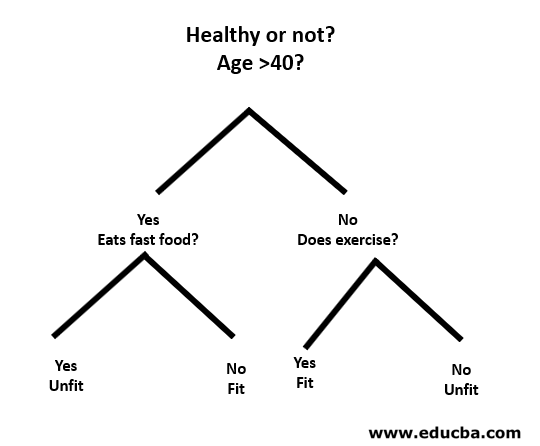

In [ ]:
# Montando o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📘Importando Bibliotecas

Utilizamos, nesse pequeno projeto, o dataset do [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview) extraído diretamente do Kaggle. Os dados estão já divididos em dois grupos:

*  training set (train.csv)
*  test set (test.csv)

In [ ]:
# Importando as bibliotecas necessárias para o treinamento do modelo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

import os

In [ ]:
# Setando a seed fixa
SEED = 17
np.random.seed(SEED)



**O DATASET DE TEST VEIO SEM OS LABELS. Muito provalvemente porque este dataset era de uma competição no kaggle.**

Vamos separa treino e teste somente no treino

In [ ]:
# Paths onde se encontram os datasets de teste e treino

dataset_train = pd.read_csv('train.csv')

#dataset_test = pd.read_csv('/content/drive/MyDrive/SI Project Titanic/titanic/test.csv')

In [ ]:
dataset_train, dataset_test = train_test_split(dataset_train, test_size = 0.3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# Cria uma nova coluna de dados de treinamento e dados de teste,
# onde ocorre a junção dos dois datasets
dataset_train['training_data'] = True
dataset_test['training_data'] = False

all_data = pd.concat([dataset_train,dataset_test])

all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,training_data
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,True
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C,True
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S,True
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,True
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,False
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,False


## 🔷 Exploração dos Dados

Existem dois tipos de dados em nosso dataset e para cada tipo, portanto, serão feitas observações diferentes:
### 1) Dados Numéricos
* Utilização de histogramas - para entender as distribuições
* Corrplot - plot das correlações entre as variáveis
* Tabelas Pivot - para comparar a taxa de sobrevivência em vista de cada uma das variáveis numéricas

### 2) Dados Categóricos
* Bar Charts - para entender o balanceamento das classes
* Tabelas Pivot - para entender a relação com 'survival', ou seja, a sobrevivência


In [ ]:
# Informações acerca do dataset de treino
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 66 to 623
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    623 non-null    int64  
 1   Survived       623 non-null    int64  
 2   Pclass         623 non-null    int64  
 3   Name           623 non-null    object 
 4   Sex            623 non-null    object 
 5   Age            498 non-null    float64
 6   SibSp          623 non-null    int64  
 7   Parch          623 non-null    int64  
 8   Ticket         623 non-null    object 
 9   Fare           623 non-null    float64
 10  Cabin          146 non-null    object 
 11  Embarked       622 non-null    object 
 12  training_data  623 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 63.9+ KB


Temos, assim:
* 177 'NULL' na coluna 'Age'
* 687 'NULL' na coluna 'Cabin'
* 2 'NULL' na coluna 'Embarked'

In [ ]:
# Descrição das colunas do dataset de treino
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,623.000000,498.000000,623.000000,623.000000,623.000000
mean,437.447833,0.370787,2.304976,29.840201,0.502408,0.382022,32.628048
std,258.454497,0.483404,0.839207,14.760696,1.029896,0.822785,50.389667
min,1.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,430.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,660.500000,1.000000,3.000000,39.000000,1.000000,0.000000,31.137500
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Mostrando as colunas
list_numerical_data = dataset_train.describe().columns.to_list()
print(list_numerical_data)
list_numerical_data = list_numerical_data[3:] # retirando 'PassengerId' (indice), 'Survived' (bool), 'Pclass' (indice)
list_numerical_data

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# Separando o dataset de treino em colunas numéricas e categóricas
df_num = dataset_train[list_numerical_data]
df_cat = dataset_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

### 🔹 Exploração - Variáveis Numéricas

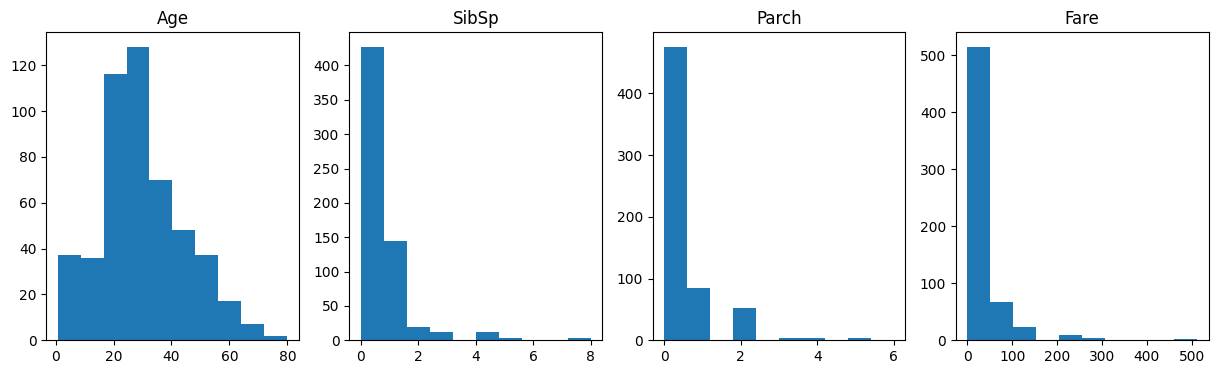

In [ ]:
# Distribuição de todas as variáveis numéricas
plt.figure(figsize = (15,4))
for i,coluna in enumerate(list_numerical_data):
    plt.subplot(1,4,i+1)
    plt.hist(df_num[coluna])
    plt.title(coluna)
plt.show()

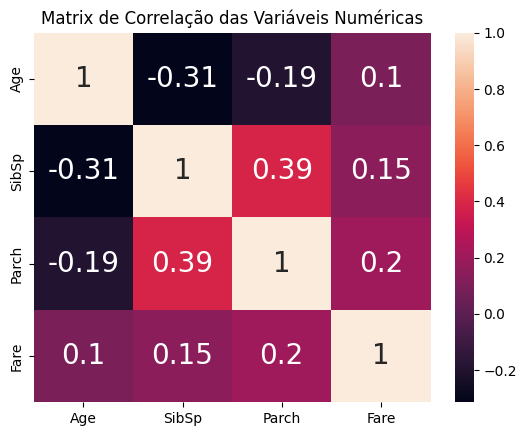

In [ ]:
# Matriz de correlação entre as features numéricas
plt.title("Matrix de Correlação das Variáveis Numéricas")
sns.heatmap(df_num.corr(),annot =  True, annot_kws = {'fontsize':20})
plt.show()

<ipython-input-19-40d6d8d09587>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Survived'] = dataset_train.Survived
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


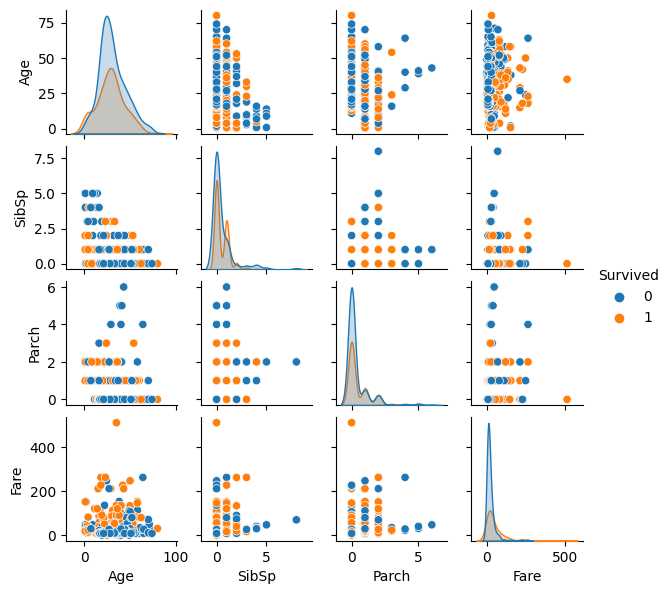

In [ ]:
#Este código cria um gráfico de dispersão pairwise (par a par) da matriz do dataset, neste caso, o argumento hue é definido como 'Class_att'
df_num['Survived'] = dataset_train.Survived
sns.pairplot(df_num, hue='Survived', size=1.5);

In [ ]:
# Função para checar o número de outliers por registro
def outlier_hunt(df):
    outlier_indices = []

    # itera sobre as features
    for col in df.columns.tolist():
        # primeiro quartil (25%)
        Q1 = np.percentile(df[col], 25)

        # terceiro quartil (75%)
        Q3 = np.percentile(df[col],75)

        # faixa interquartil
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        # Determina uma lista de índices de outliers para coluna de recurso
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # acrescenta os índices discrepantes encontrados para col à lista de índices discrepantes
        outlier_indices.extend(outlier_list_col)

    # selecionar observações contendo mais de 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print(df_num.shape)
print('A base de dados contém %d observações com mais de 2 outliers' %(len(outlier_hunt(df_num[list_numerical_data]))))

(623, 5)
A base de dados contém 5 observações com mais de 2 outliers


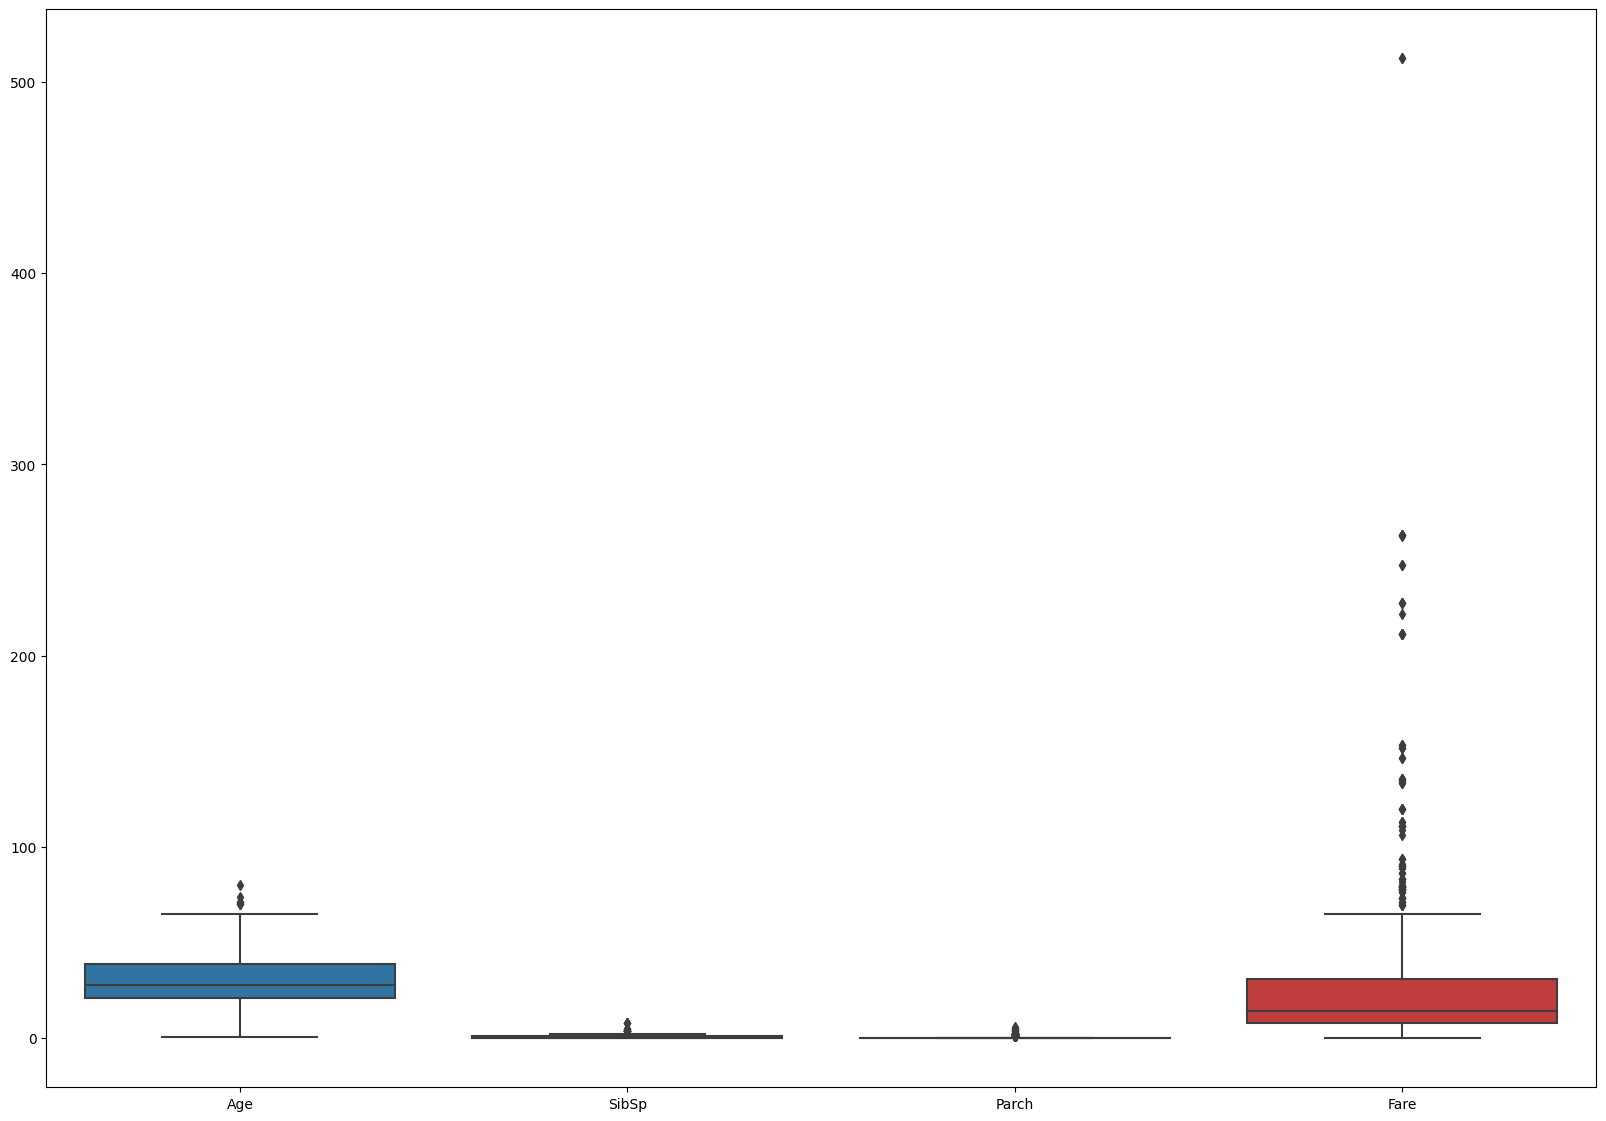

In [ ]:
# Boxplot das features numéricas
plt.figure(figsize=(20,14))
sns.boxplot(data=df_num[list_numerical_data])
plt.show()

In [ ]:
# Remoção dos registros que contém mais de dois outliers
outlier_indices = outlier_hunt(df_num[list_numerical_data])
df_num = df_num.drop(outlier_indices).reset_index(drop=True)
print(df_num.shape)

(618, 5)


In [ ]:
# Compara a taxa de sobrevivência entre as features Age, SibSp, Parch, and Fare
pd.pivot_table(dataset_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.565359,23.103707,0.346939,0.517857
1,28.684479,48.790566,0.441558,0.476190


### 🔹 Exploração - Variáveis Categóricas

In [ ]:
# Transformando a variável categórica 'sexo' para um valor binário
print(np.unique(df_cat['Sex'],return_counts = True))
df_cat['Sex'] = np.where(df_cat['Sex'] == 'male',1,0)
print(np.unique(df_cat['Sex'],return_counts = True))


(array(['female', 'male'], dtype=object), array([211, 412]))
(array([0, 1]), array([211, 412]))


<ipython-input-24-802ad0b304d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Sex'] = np.where(df_cat['Sex'] == 'male',1,0)


Comparando a taxa "Survived" com as outras variaveis categoricas

In [ ]:
# Gera uma tabela dinâmica onde as linhas são os sobreviventes e as colunas são pertencentes
# a variável Pclass, sendo a ocorrência de tickets o valor dos registros
pd.pivot_table(dataset_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')


Pclass,1,2,3
Survived,,,
0,61,67,264
1,92,60,79


In [ ]:
# Gera uma tabela dinâmica onde as linhas são os sobreviventes e as colunas são pertencentes
# a variável Sex, sendo a ocorrência de tickets o valor dos registros
pd.pivot_table(dataset_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')


Sex,female,male
Survived,,
0,52,340
1,159,72


In [ ]:
# Gera uma tabela dinâmica onde as linhas são os sobreviventes e as colunas são pertencentes
# a variável Embarked, sendo a ocorrência de tickets o valor dos registros
pd.pivot_table(dataset_train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count')

Embarked,C,Q,S
Survived,,,
0,49,33,310
1,64,24,142


## Feature Engineering
### 1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

### 2) Tickets - Diferentes tipos de tickets podem alterar a taxa de sobrevivencia?

### 3) O "Tittle" de uma pessoa se relaciona com sua taxa de sobrevivencia?

In [ ]:
#Cria uma nova coluna chamada "cabin_multiple" e preenche com a contagem do número de cabines associadas a cada registro na coluna "Cabin" do DataFrame "df_cat".
df_cat.Cabin
dataset_train['cabin_multiple'] = dataset_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# Podemos querer ver a cabine por letra ou por número. Vamos criar algumas categorias
# letters
# multiple letters
dataset_train['cabin_multiple'].value_counts()

0    477
1    128
2     13
3      4
4      1
Name: cabin_multiple, dtype: int64

In [ ]:
# Gera uma tabela dinâmica onde as linhas são os sobreviventes e as colunas são pertencentes
# a variável cabin_multiple, sendo a ocorrência de tickets o valor dos registros
pd.pivot_table(dataset_train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,339.0,45.0,5.0,3.0,NaN
1,138.0,83.0,8.0,1.0,1.0


In [ ]:
# Cria categorias baseado na carta da cabine (n significa nulo)
# Nesse caso iremos tratar valores nulos como categoria própria

dataset_train['cabin_adv'] = dataset_train.Cabin.apply(lambda x: str(x)[0])


In [ ]:
# Compara a taxa de sobrevivência por cabine
print(dataset_train.cabin_adv.value_counts())
pd.pivot_table(dataset_train,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    477
C     47
B     30
E     26
D     21
F      9
A      9
G      4
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,n
Survived,,,,,,,,
0,5,8,19,8,8,3,2,339
1,4,22,28,13,18,6,2,138


In [ ]:
# Entendendo melhor os valores de ticket
# Numérico vs não-numérico
dataset_train['numeric_ticket'] = dataset_train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
dataset_train['ticket_letters'] = dataset_train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

dataset_train['numeric_ticket'].value_counts()

1    460
0    163
Name: numeric_ticket, dtype: int64

In [ ]:
# Possibilita ver todas as linhas do dataset
pd.set_option("display.max_rows", None)
dataset_train['ticket_letters'].value_counts()

0            463
pc            44
ca            27
a5            16
stono2        11
sotonoq       10
scparis        8
a4             6
soc            5
wc             5
c              5
fcc            4
pp             3
sopp           2
sotono2        2
wep            2
ppp            2
scow           1
swpp           1
fa             1
scahbasle      1
scah           1
casoton        1
sp             1
sc             1
Name: ticket_letters, dtype: int64

In [ ]:
# Diferença entre tickets numéricos vs não-numéricos na taxa de sobrevivência
pd.pivot_table(dataset_train,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,100,292
1,63,168


In [ ]:
#Taxa de sobrevivência através de diferentes valores de tickets
pd.pivot_table(dataset_train,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,c,ca,casoton,fa,fcc,pc,pp,...,scparis,soc,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,294.0,6.0,15.0,3.0,18.0,1.0,1.0,1.0,17.0,1.0,...,4.0,4.0,2.0,2.0,8.0,1.0,6.0,NaN,4.0,2.0
1,169.0,NaN,1.0,2.0,9.0,NaN,NaN,3.0,27.0,2.0,...,4.0,1.0,NaN,NaN,2.0,NaN,5.0,1.0,1.0,NaN


In [ ]:
# cria uma nova coluna chamada "name_title" e preenche com o título de cada nome presente na coluna "Name" do DataFrame "dataset_train".

dataset_train.Name.head(50)
dataset_train['name_title'] = dataset_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
dataset_train['name_title'].value_counts()

Mr          369
Miss        119
Mrs          90
Master       28
Rev           5
Dr            5
Jonkheer      1
Mlle          1
Sir           1
Ms            1
Capt          1
Major         1
Don           1
Name: name_title, dtype: int64

## Preprocessamento de data para o modelo
### 1) Dropar valores nulos de Embarked (Apenas 2)

### 2)  Incluir apenas variaveis relevantes (Pois temos dados limitados, quisemos excluir coisas como os nomes e ID dos passageiros para ter um número razoavel de features para nosso modelo lidar)
Variables:  'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

### 3) Fazer transformacoes categoricas em todo o Data. Geralmente poderiamos usar um transformador, mas com esse tipo de abordagem garantimos que nosso data de treinamento e de testes tem a mesma coluna. Tambem poderiamos inferir algo sobre o Shape do data de teste por esse metodo.

### 4) Data com media para "fare" e "age"

### 5) "Fare" normalizada usando logaritmo para parecer mais natural

### 6) Data escalada 0 - 1 com um escalador comum


In [ ]:
#Criar todas as variaveis para o dataset e o test set
all_data['cabin_multiple']  = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv']       = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket']  = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters']  = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title']      = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


In [ ]:
#impute nulls for continuous data
#all_data.Age   = all_data.Age.fillna(dataset_train.Age.mean())
all_data.Age    = all_data.Age.fillna(dataset_train.Age.median())
#all_data.Fare  = all_data.Fare.fillna(dataset_train.Fare.mean())
all_data.Fare   = all_data.Fare.fillna(dataset_train.Fare.median())

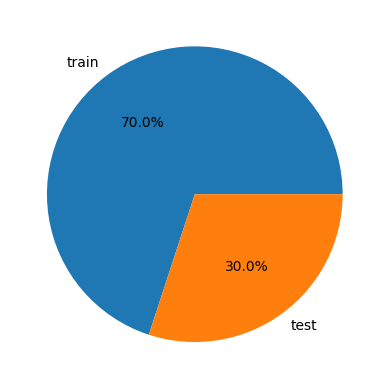

In [ ]:
#exclui as colunas que estao marcadas com "embarked"
all_data.dropna(subset=['Embarked'],inplace = True)



all_data.Pclass = all_data.Pclass.astype(str)

#criar variaveis de "exemplo"
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','training_data']])

#dividir para treinar os testes
X_train = all_dummies[all_dummies.training_data == 1].drop(['training_data'], axis =1)
X_test  = all_dummies[all_dummies.training_data == 0].drop(['training_data'], axis =1)


y_train = all_data[all_data.training_data==1].Survived
y_test = all_data[all_data.training_data==0].Survived

plt.pie([len(y_train),len(y_test)],labels = ["train","test"],autopct  = "%1.1f%%")
plt.show()

In [ ]:
#Realiza a busca dos melhores hiperparâmetros para um modelo de classificação de árvore de decisão (DecisionTreeClassifier) usando a técnica de Grid Search Cross-Validation (GridSearchCV).
arvore = tree.DecisionTreeClassifier(random_state = SEED)
param_grid =  {
               'criterion':['gini','entropy'],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

searcher_arvore = GridSearchCV(arvore, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_arvore = searcher_arvore.fit(X_train,y_train)

print('Best Score: ' + str(searcher_arvore.best_score_))
print('Best Parameters: ' + str(searcher_arvore.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Score: 0.8149935483870967
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
# realiza uma grid search para encontrar os melhores hiperparâmetros para um modelo de classificação de floresta aleatória (Random Forest)
rf = RandomForestClassifier(random_state = SEED)
param_grid =  {'n_estimators': [40,45,50],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],

                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}

searcher_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = searcher_rf.fit(X_train,y_train)

print('Best Score: ' + str(searcher_rf.best_score_))
print('Best Parameters: ' + str(searcher_rf.best_params_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Score: 0.8295225806451612
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}


In [ ]:
#realiza validação cruzada em modelos de aprendizado de máquina utilizando as funções cross_val_score e mean
cv = cross_val_score(best_arvore,X_train,y_train,cv=5)
print("arvore de decisao")
print(cv)
print(cv.mean())


cv = cross_val_score(best_clf_rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Fitting 5 folds for each of 72 candidates, totalling 360 fits
arvore de decisao
[0.824      0.792      0.84677419 0.78225806 0.72580645]
0.7941677419354839
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[0.832      0.848      0.83064516 0.82258065 0.76612903]
0.8198709677419356


In [ ]:
#usa o modelo treinado, na variável best_arvore, para fazer previsões nos dados de treinamento (X_train) e avaliar o desempenho do modelo usando o classification_report em comparação com o y_train.
y_pred = best_arvore.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       392
           1       0.92      0.74      0.82       230

    accuracy                           0.88       622
   macro avg       0.89      0.85      0.87       622
weighted avg       0.89      0.88      0.88       622



In [ ]:
#usa o modelo treinado, na variável best_arvore, para fazer previsões nos dados de teste (X_teste) e avaliar o desempenho do modelo usando o classification_report em comparação com o y_teste.
y_pred = best_arvore.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.77      0.69      0.73       110

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.78       267



In [ ]:
##usa o modelo treinado, na variável best_arvore, para fazer previsões nos dados de treinamento (X_train) e avaliar o desempenho do modelo usando o classification_report em comparação com o y_teste.
y_pred = best_clf_rf.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91       392
           1       0.91      0.77      0.83       230

    accuracy                           0.89       622
   macro avg       0.89      0.86      0.87       622
weighted avg       0.89      0.89      0.89       622



In [ ]:
##usa o modelo treinado, na variável best_arvore, para fazer previsões nos dados de teste (X_teste) e avaliar o desempenho do modelo usando o classification_report em comparação com o y_teste.
y_pred = best_clf_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.80      0.64      0.71       110

    accuracy                           0.79       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.79      0.79      0.78       267

